<a href="https://colab.research.google.com/github/bviz6542/CrowdChicken/blob/main/8_ANN_JW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [243]:
import numpy as np
import pandas as pd
import os
import theano
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [244]:
from google.colab import files

myfile = files.upload()
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

Saving Churn_Modelling.csv to Churn_Modelling (3).csv


In [245]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [246]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [247]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [248]:
# some columns are totally unproductive so let's remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [249]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [250]:
# some columns have text data so let's one hot encode them
#  for more on one hot encoding click this link below
# https://www.kaggle.com/shrutimechlearn/types-of-regression-and-stats-in-depth
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [251]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [252]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [253]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [254]:
churn_data_encoded = Gender_dummies

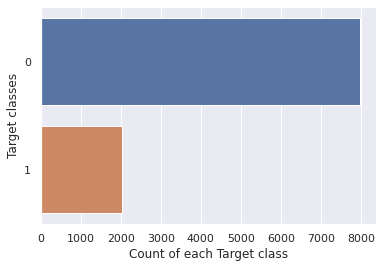

In [255]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

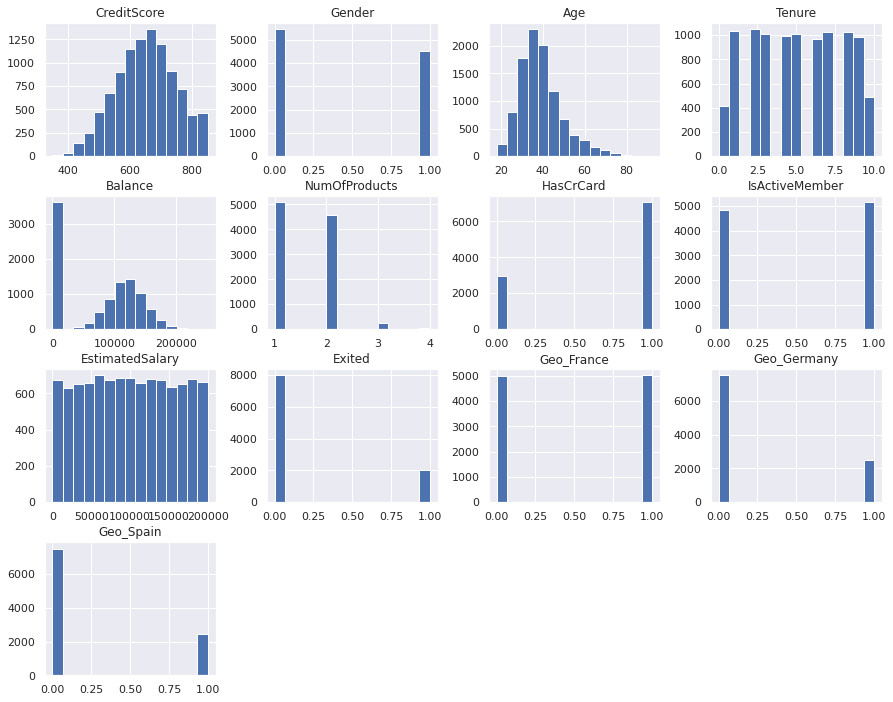

In [256]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

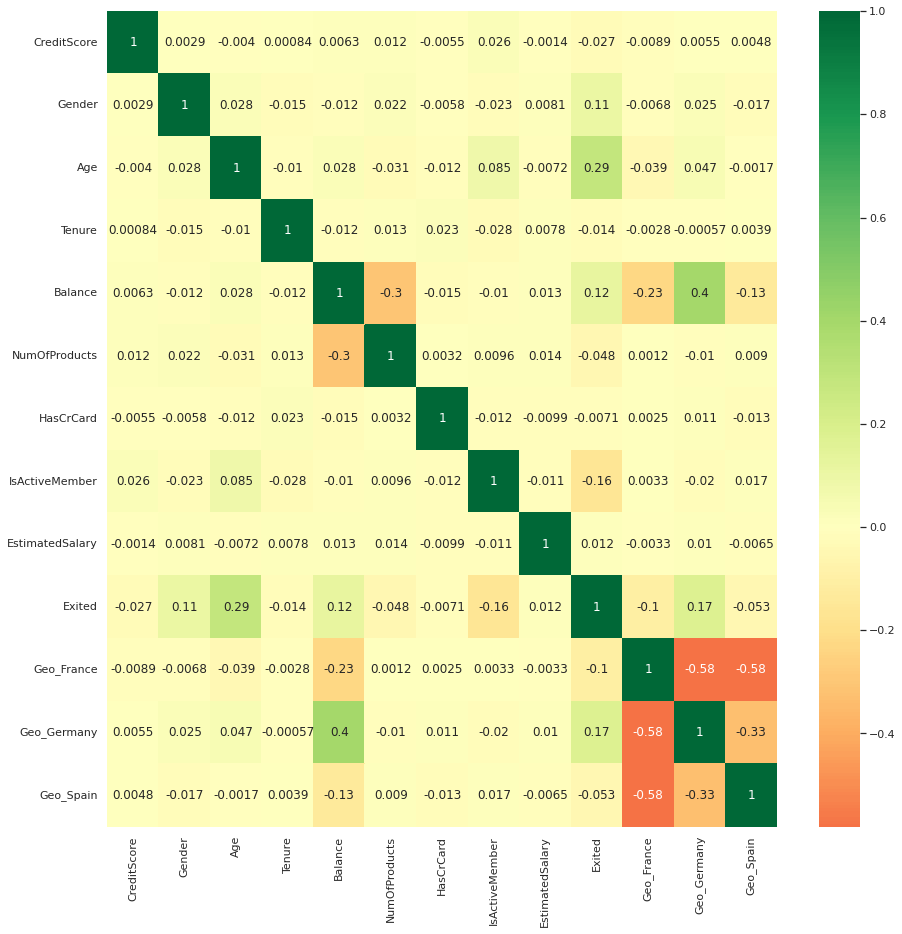

In [257]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

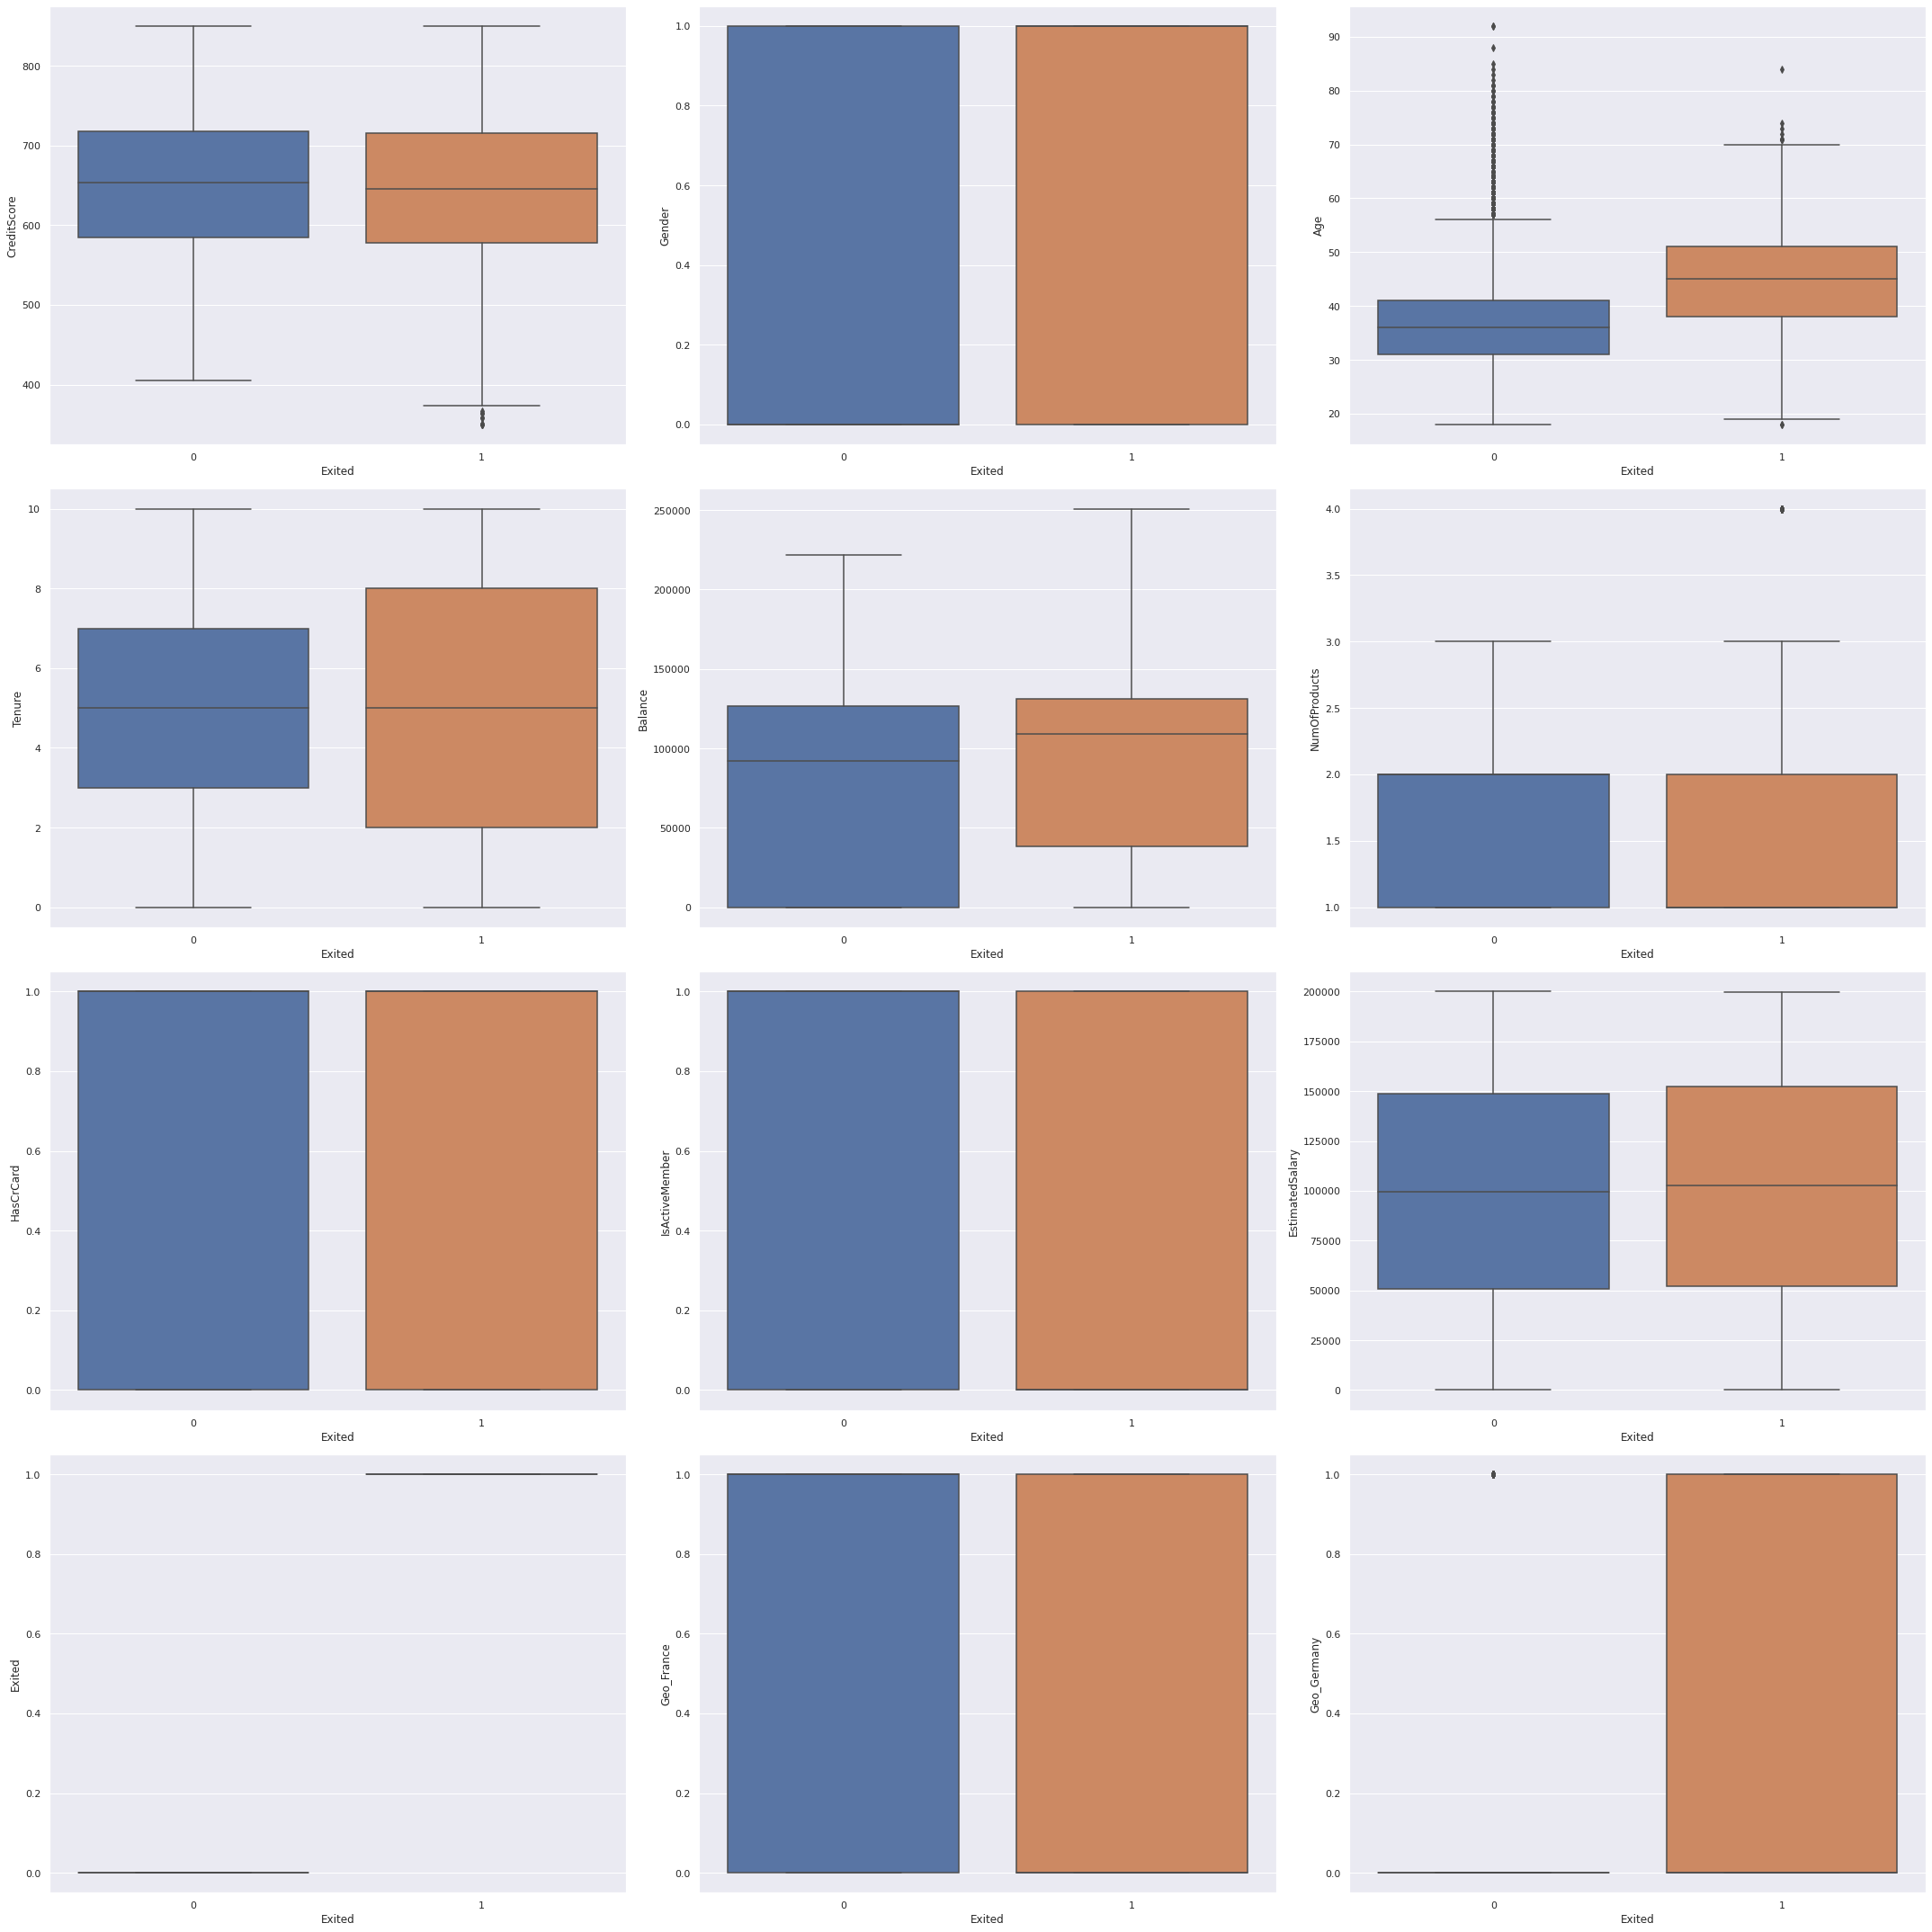

In [258]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [259]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [260]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


In [261]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [262]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


In [263]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



---



---



---



## 히든 레이어 3개



In [264]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
#network.add(layers.Dense(256, activation = 'relu'))
#network.add(layers.Dense(128, activation = 'relu'))
#network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 5ms/step - loss: 0.4181 - accuracy: 0.8225 - val_loss: 0.3763 - val_accuracy: 0.8394 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8506 - val_loss: 0.3660 - val_accuracy: 0.8562 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8542 - val_loss: 0.3585 - val_accuracy: 0.8575 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8606 - val_loss: 0.3651 - val_accuracy: 0.8475 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8594 - val_loss: 0.3598 - val_accuracy: 0.8537 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8614 - val_loss: 0.3617 - val_accuracy: 0.8519 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3

In [265]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [266]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [267]:
network.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                832       
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dense_98 (Dense)            (None, 8)                 264       
                                                                 
 dense_99 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,185
Trainable params: 3,185
Non-trainable params: 0
_________________________________________________________________


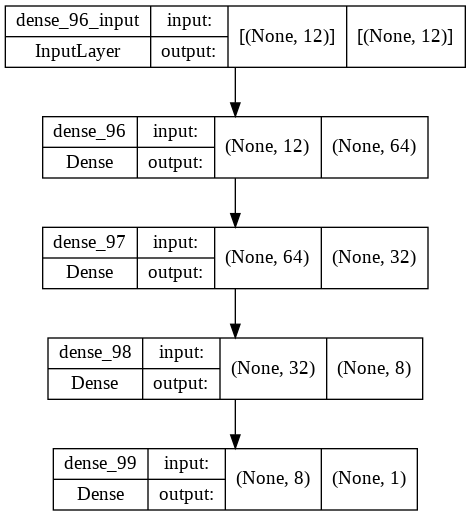

In [268]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

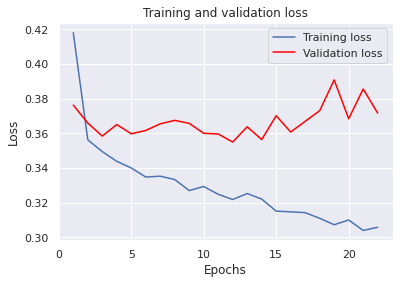

In [269]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

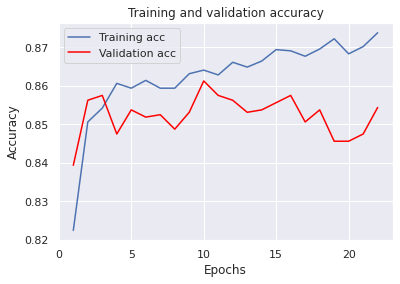

In [270]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [271]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8525
test loss: 0.34629517793655396
test_accuracy: 0.8525000214576721


Text(0.5, 12.5, 'Predicted label')

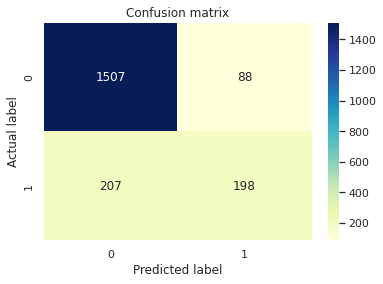

In [272]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [273]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.69      0.49      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



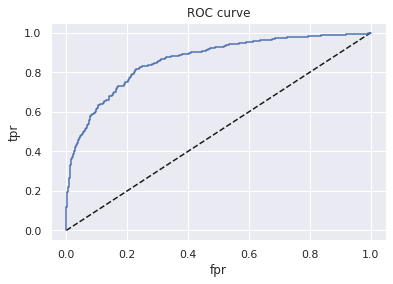

In [274]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [275]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8615209566933706



---



---



---



## 히든 레이어 4개

In [276]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
#network.add(layers.Dense(256, activation = 'relu'))
#network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.8164 - val_loss: 0.4032 - val_accuracy: 0.8238 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8445 - val_loss: 0.3822 - val_accuracy: 0.8519 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8534 - val_loss: 0.3708 - val_accuracy: 0.8469 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8586 - val_loss: 0.3681 - val_accuracy: 0.8481 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8609 - val_loss: 0.3581 - val_accuracy: 0.8481 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3378 - accuracy: 0.8617 - val_loss: 0.3542 - val_accuracy: 0.8606 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.3

In [277]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [278]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [279]:
network.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 128)               1664      
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dense_102 (Dense)           (None, 32)                2080      
                                                                 
 dense_103 (Dense)           (None, 8)                 264       
                                                                 
 dense_104 (Dense)           (None, 1)                 9         
                                                                 
Total params: 12,273
Trainable params: 12,273
Non-trainable params: 0
_________________________________________________________________


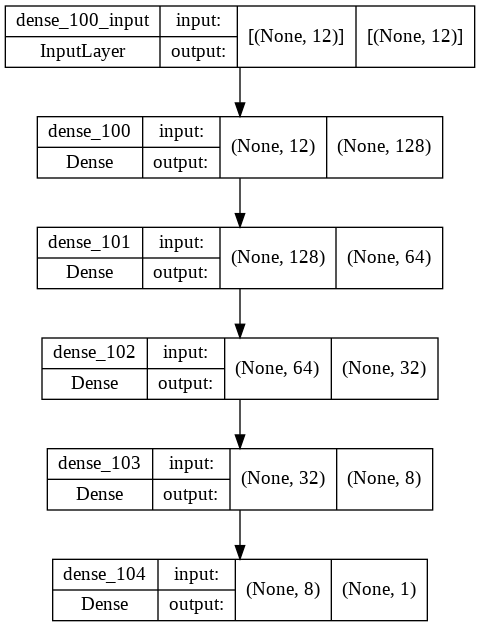

In [280]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

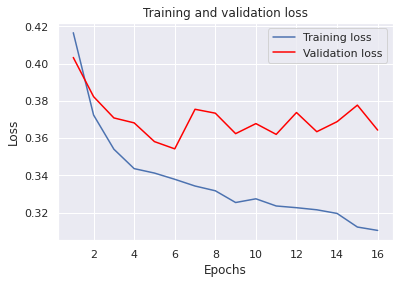

In [281]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

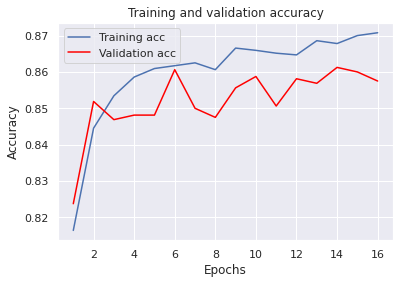

In [282]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [283]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8630
test loss: 0.3478328287601471
test_accuracy: 0.8629999756813049


Text(0.5, 12.5, 'Predicted label')

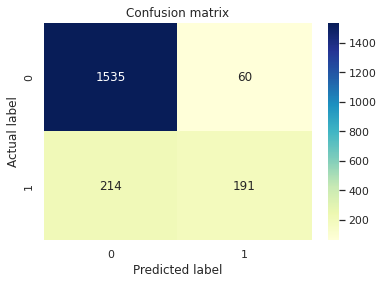

In [284]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [285]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



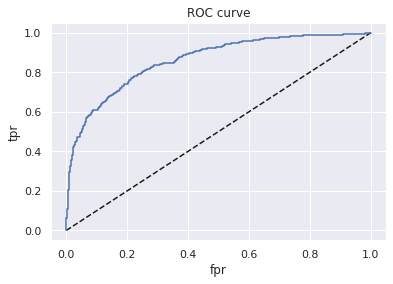

In [286]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [287]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8606865590773636



---



---



---



## 히든 레이어 5개

In [288]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 2s 6ms/step - loss: 0.4179 - accuracy: 0.8175 - val_loss: 0.3904 - val_accuracy: 0.8406 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8481 - val_loss: 0.3690 - val_accuracy: 0.8512 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.8548 - val_loss: 0.3660 - val_accuracy: 0.8525 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.8587 - val_loss: 0.3710 - val_accuracy: 0.8469 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.8570 - val_loss: 0.3625 - val_accuracy: 0.8525 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.8609 - val_loss: 0.3558 - val_accuracy: 0.8575 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.3

In [289]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [290]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [291]:
network.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 256)               3328      
                                                                 
 dense_106 (Dense)           (None, 128)               32896     
                                                                 
 dense_107 (Dense)           (None, 64)                8256      
                                                                 
 dense_108 (Dense)           (None, 32)                2080      
                                                                 
 dense_109 (Dense)           (None, 8)                 264       
                                                                 
 dense_110 (Dense)           (None, 1)                 9         
                                                                 
Total params: 46,833
Trainable params: 46,833
Non-tra

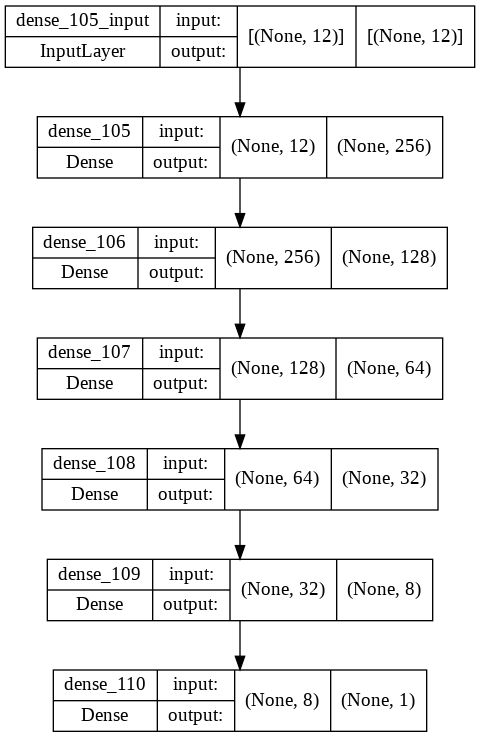

In [292]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

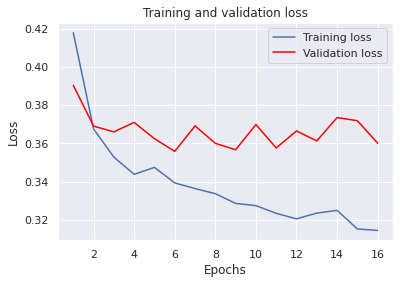

In [293]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

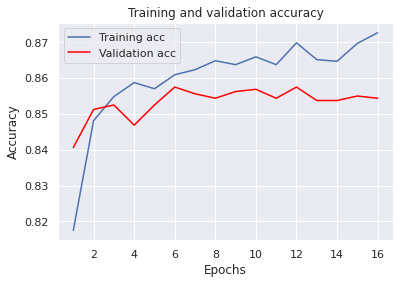

In [294]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [295]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8595
test loss: 0.3454020023345947
test_accuracy: 0.859499990940094


Text(0.5, 12.5, 'Predicted label')

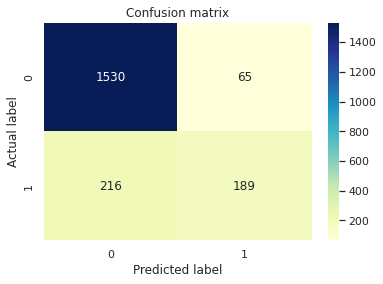

In [296]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [297]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.47      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



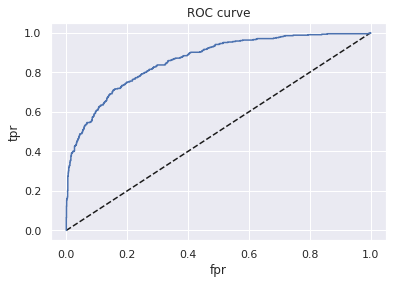

In [298]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [299]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8618615271488834



---



---



---



## 히든 레이어 7개 (이게 6개보다 후짐. 근거는 정확도, ROC 밑넓이, 연산량, 복합적인 고려)

In [300]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(1024, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(512, activation = 'relu'))
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 3s 20ms/step - loss: 0.4397 - accuracy: 0.8123 - val_loss: 0.4262 - val_accuracy: 0.8250 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 2s 17ms/step - loss: 0.3832 - accuracy: 0.8377 - val_loss: 0.3824 - val_accuracy: 0.8537 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 2s 17ms/step - loss: 0.3689 - accuracy: 0.8478 - val_loss: 0.3743 - val_accuracy: 0.8562 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 2s 19ms/step - loss: 0.3624 - accuracy: 0.8492 - val_loss: 0.3876 - val_accuracy: 0.8400 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 2s 17ms/step - loss: 0.3640 - accuracy: 0.8503 - val_loss: 0.3721 - val_accuracy: 0.8531 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 2s 17ms/step - loss: 0.3502 - accuracy: 0.8591 - val_loss: 0.3606 - val_accuracy: 0.8594 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 2s 17ms/step - lo

In [301]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [302]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [303]:
network.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 1024)              13312     
                                                                 
 dense_112 (Dense)           (None, 512)               524800    
                                                                 
 dense_113 (Dense)           (None, 256)               131328    
                                                                 
 dense_114 (Dense)           (None, 128)               32896     
                                                                 
 dense_115 (Dense)           (None, 64)                8256      
                                                                 
 dense_116 (Dense)           (None, 32)                2080      
                                                                 
 dense_117 (Dense)           (None, 8)               

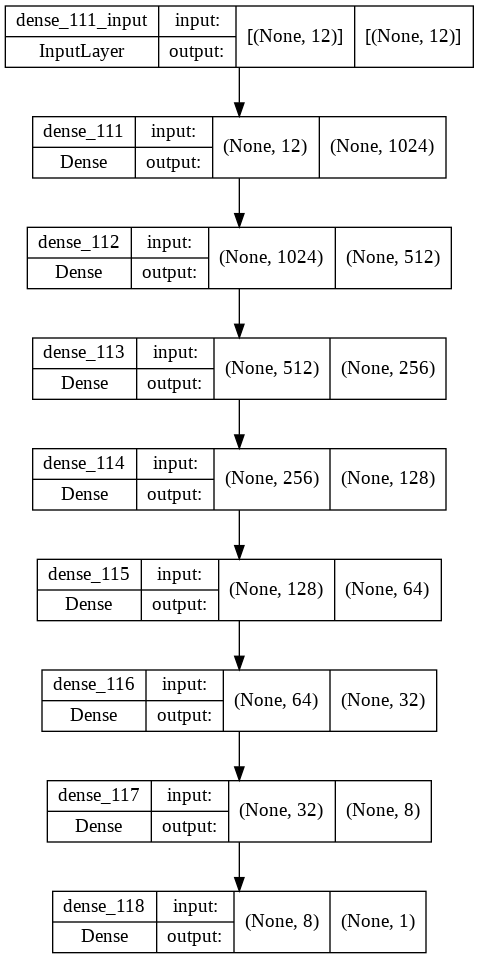

In [304]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)


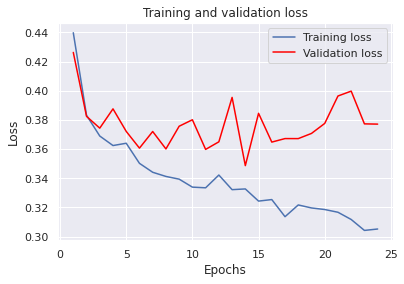

In [305]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

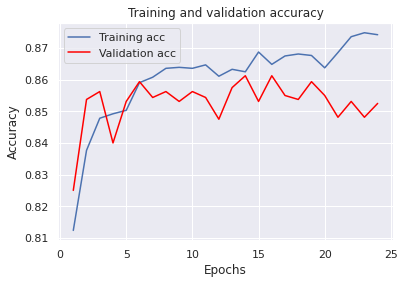

In [306]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [307]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.8610
test loss: 0.3430624306201935
test_accuracy: 0.8610000014305115


Text(0.5, 12.5, 'Predicted label')

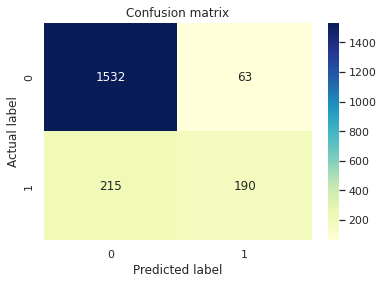

In [308]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [309]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



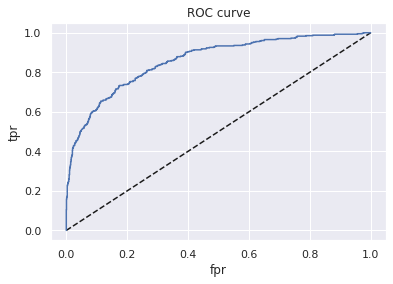

In [310]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [311]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8589318472077093

## 히든 레이어 6개

In [312]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)))# Hidden layer & Input layer
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation = 'relu'))
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(1, activation = 'sigmoid')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용


# Optimizer
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

network.compile(optimizer=adam,
               loss='binary_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(X_train, y_train, epochs=100, batch_size=70, validation_split=0.2,
                          callbacks=[es, lr])

Epoch 1/100
92/92 [==============================] - 2s 9ms/step - loss: 0.4355 - accuracy: 0.7941 - val_loss: 0.4467 - val_accuracy: 0.7969 - lr: 0.0100
Epoch 2/100
92/92 [==============================] - 1s 8ms/step - loss: 0.3906 - accuracy: 0.8400 - val_loss: 0.3904 - val_accuracy: 0.8388 - lr: 0.0100
Epoch 3/100
92/92 [==============================] - 1s 8ms/step - loss: 0.3791 - accuracy: 0.8492 - val_loss: 0.3778 - val_accuracy: 0.8487 - lr: 0.0100
Epoch 4/100
92/92 [==============================] - 1s 8ms/step - loss: 0.3788 - accuracy: 0.8445 - val_loss: 0.3926 - val_accuracy: 0.8400 - lr: 0.0100
Epoch 5/100
92/92 [==============================] - 1s 7ms/step - loss: 0.3667 - accuracy: 0.8480 - val_loss: 0.3830 - val_accuracy: 0.8550 - lr: 0.0100
Epoch 6/100
92/92 [==============================] - 1s 7ms/step - loss: 0.3578 - accuracy: 0.8595 - val_loss: 0.3737 - val_accuracy: 0.8575 - lr: 0.0100
Epoch 7/100
92/92 [==============================] - 1s 8ms/step - loss: 0.3

In [313]:
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

In [314]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [315]:
network.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 512)               6656      
                                                                 
 dense_120 (Dense)           (None, 256)               131328    
                                                                 
 dense_121 (Dense)           (None, 128)               32896     
                                                                 
 dense_122 (Dense)           (None, 64)                8256      
                                                                 
 dense_123 (Dense)           (None, 32)                2080      
                                                                 
 dense_124 (Dense)           (None, 8)                 264       
                                                                 
 dense_125 (Dense)           (None, 1)               

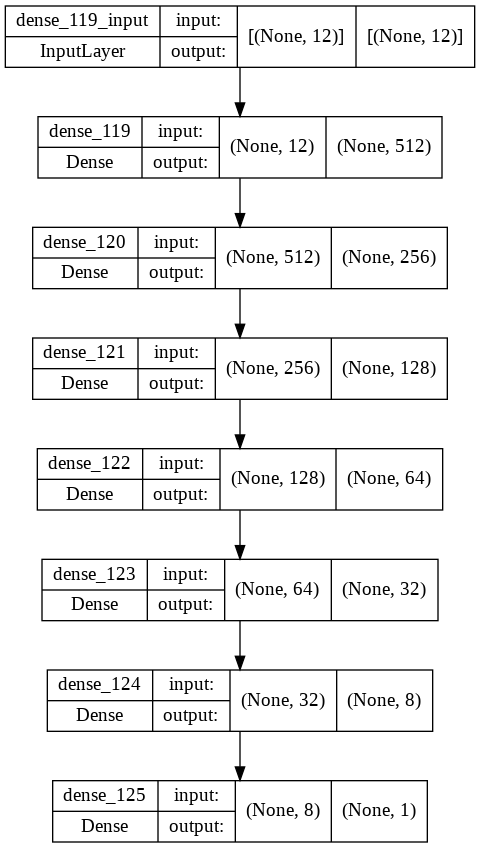

In [316]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)


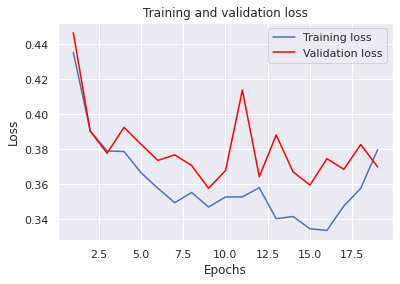

In [317]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


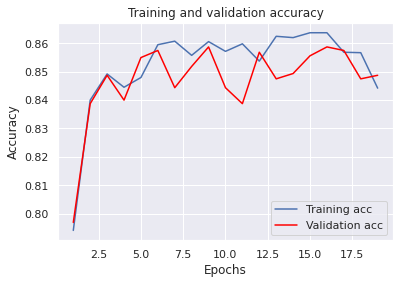

In [318]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [319]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8570
test loss: 0.3477851152420044
test_accuracy: 0.8569999933242798


Text(0.5, 12.5, 'Predicted label')

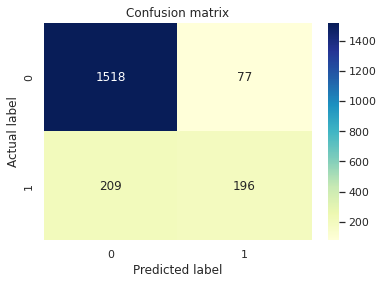

In [320]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [321]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



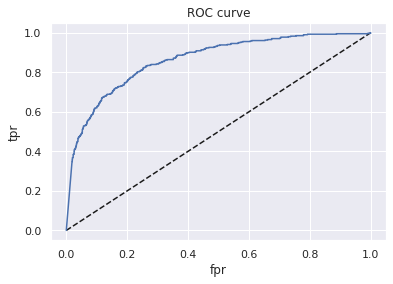

In [322]:
from sklearn.metrics import roc_curve
y_pred_proba = network.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()


In [323]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8625922055807114



---



---



---



## 정해진 모델에 대한 구체적인 분석

In [324]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[ 0.10933799,  0.288297  , -0.03527979, ...,  0.05654094,
         -0.13172935,  0.13130558],
        [ 0.11246116, -0.30476052,  0.12557748, ..., -0.1568826 ,
          0.10406737, -0.20713717],
        [ 0.26423526, -0.45996618, -0.15343815, ..., -0.09099144,
          0.28492433, -0.03410653],
        ...,
        [-0.04337953,  0.35445476,  0.0076505 , ..., -0.07410925,
         -0.08705278,  0.2947185 ],
        [ 0.1053111 , -0.04592095,  0.02556233, ...,  0.06297483,
          0.0208811 , -0.2684314 ],
        [ 0.04435844, -0.3264065 ,  0.19245608, ..., -0.02408456,
          0.02518003, -0.05438869]], dtype=float32),
 array([-0.7742281 ,  0.3383289 , -0.0293123 ,  0.47634628, -0.30799332,
        -0.19301166, -0.14315723, -0.11148408, -0.5570924 , -0.06504717,
        -0.51918656, -0.150481  , -0.7363758 ,  0.56650716, -0.15374908,
        -0.4101306 , -0.33185726,  0.10646726, -0.2910883 , -1.0033069 ,
        -0.23911385,  0.38462937, -0.71638924, -0.32866114, -0.445

In [325]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.109338,0.288297,-0.035280,-0.032479,0.017386,-0.014500,-0.016180,-0.007556,-0.091103,-0.136285,...,0.100746,0.190342,-0.116024,0.067346,-0.006911,-0.025907,-0.171640,0.056541,-0.131729,0.131306
1,0.112461,-0.304761,0.125577,0.014415,0.049216,-0.146706,-0.132158,-0.124297,-0.015184,0.191221,...,-0.134607,0.185967,-0.130924,-0.128351,-0.012822,-0.117510,-0.243808,-0.156883,0.104067,-0.207137
2,0.264235,-0.459966,-0.153438,-0.450960,-0.002733,-0.230262,-0.097963,-0.082145,-0.704810,-0.275262,...,0.344142,-0.281918,-0.091316,0.312280,-0.049094,0.015589,-0.227267,-0.090991,0.284924,-0.034107
3,0.301118,0.039141,0.063325,-0.010824,0.041303,-0.072788,-0.059249,-0.023981,0.136994,-0.087599,...,0.278337,-0.422244,0.110876,0.079508,-0.015958,0.082229,0.308910,0.195161,-0.099299,-0.279620
4,-0.205576,-0.181409,-0.097495,-0.123730,-0.827511,-0.018498,-0.048980,-0.120129,0.262985,-0.101081,...,-0.199964,-0.634105,-0.088848,-0.023309,0.014851,-0.025603,-0.137418,-0.098265,-0.008739,0.282046
5,0.130044,-0.050026,-0.048730,0.003518,-0.851281,-0.093897,0.009393,0.004859,0.011126,0.137332,...,-0.053469,0.052643,-0.087414,0.019918,0.010184,0.005661,-0.130209,0.063634,0.080453,-0.087909
6,0.177215,-0.007785,0.192801,0.034491,-0.013292,-0.085384,0.310273,0.215995,-0.004547,0.246392,...,0.072515,-0.240932,0.047909,0.236926,0.003706,0.086075,0.083677,0.038861,0.057016,0.177893
7,0.398441,-0.079696,0.030567,0.067663,-0.007713,0.243170,0.266964,0.360417,0.048458,-0.064484,...,0.404404,0.273011,0.132883,0.564301,0.010322,0.204092,0.159265,0.185366,0.608896,0.252994
8,-0.307057,-0.196987,-0.291334,-0.110514,0.054744,-0.219228,0.282013,0.076846,0.039698,0.045126,...,-0.219506,0.033040,0.185879,-0.043834,-0.027459,0.012811,0.005035,0.133090,-0.023619,-0.048608
9,-0.043380,0.354455,0.007650,0.316806,-0.223888,0.086834,0.091413,-0.025988,0.152534,0.059415,...,0.065913,-0.003691,0.086461,-0.055236,-0.010453,-0.081103,-0.247286,-0.074109,-0.087053,0.294719


In [326]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

,0
0,-0.774228
1,0.338329
2,-0.029312
3,0.476346
4,-0.307993
...,...
507,-0.235653
508,-0.102019
509,-0.318877
510,-0.503579


In [327]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.121424,-0.067977,-0.170393,-0.147298,0.003674,-0.138323,-0.144184,0.060851,-0.032933,0.003305,...,-0.015817,-0.093669,0.072456,-0.197127,-0.109232,-0.100183,-0.099414,0.009768,0.061244,-0.030366
1,-0.098764,-0.025603,0.057457,0.023118,0.011801,-0.030977,-0.048449,-0.060802,0.022263,-0.089147,...,-0.072149,-0.077136,-0.157617,-0.198305,-0.035264,-0.131288,-0.037631,0.135426,-0.064119,0.010990
2,-0.000255,-0.167949,-0.064934,0.013879,-0.047819,0.013366,0.165424,-0.090353,0.007031,-0.066773,...,-0.089043,-0.108691,-0.221631,0.004713,-0.099154,-0.026317,-0.141022,-0.036157,-0.021382,-0.025647
3,-0.133802,-0.269967,0.007658,-0.112596,-0.089388,-0.061687,0.020864,-0.095752,-0.142764,-0.040989,...,-0.026120,-0.108870,-0.525438,-0.206667,-0.054115,-0.033103,-0.044480,0.191049,-0.150697,-0.107211
4,-0.030367,-0.138340,-0.260690,-0.050458,-0.012613,-0.105140,-0.042580,0.113081,-0.126196,0.136516,...,-0.007498,0.120421,-0.201490,-0.162103,-0.274677,-0.051430,-0.107039,-0.183777,0.064663,0.027242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-0.128009,-0.056273,-0.096751,-0.003790,-0.111624,-0.014187,-0.012490,0.027513,0.025199,-0.090557,...,-0.077662,0.047534,0.012473,-0.057241,-0.017938,0.008273,-0.135836,-0.045647,-0.073526,-0.107199
508,0.012500,-0.212490,-0.239318,-0.092375,-0.004444,-0.091926,0.272597,-0.107251,-0.002895,-0.099054,...,-0.076931,-0.072289,-0.137799,0.026156,0.050138,-0.087604,-0.022488,-0.081832,-0.100389,-0.064062
509,-0.080462,-0.071941,-0.221887,0.023280,-0.058392,0.075407,-0.022578,0.036496,-0.111999,-0.013779,...,-0.015046,0.130873,-0.027833,-0.056723,-0.021809,-0.050671,-0.045544,-0.015333,-0.058147,-0.103834
510,0.009579,-0.039059,-0.065018,-0.004434,-0.122978,-0.054234,0.042221,-0.042547,0.018232,0.008619,...,-0.146985,-0.123331,-0.112859,0.128808,0.062007,-0.140512,-0.034510,-0.089467,-0.129917,-0.136533


In [328]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

,0
0,-0.071017
1,-0.065518
2,-0.000006
3,-0.083171
4,-0.060089
...,...
251,-0.059447
252,-0.060146
253,0.417088
254,-0.083989


In [329]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [330]:
cls_history.history

{'accuracy': [0.7940624952316284,
  0.8399999737739563,
  0.8492187261581421,
  0.844531238079071,
  0.8479687571525574,
  0.8595312237739563,
  0.8607812523841858,
  0.8557812571525574,
  0.8606250286102295,
  0.8571875095367432,
  0.8598437309265137,
  0.8537499904632568,
  0.862500011920929,
  0.8620312213897705,
  0.8637499809265137,
  0.8637499809265137,
  0.8568750023841858,
  0.8567187786102295,
  0.8442187309265137],
 'loss': [0.43550875782966614,
  0.39061856269836426,
  0.3791162371635437,
  0.37879616022109985,
  0.3667448163032532,
  0.35781750082969666,
  0.3495272696018219,
  0.3553948998451233,
  0.34707263112068176,
  0.3528274893760681,
  0.3528732359409332,
  0.35813140869140625,
  0.3404068052768707,
  0.3416532278060913,
  0.3346274197101593,
  0.33371150493621826,
  0.3476528823375702,
  0.3577612340450287,
  0.37987467646598816],
 'lr': [0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  

참고 (ANN):

https://onesixx.com/optimizer-loss-metrics/

https://keras.io/ko/metrics/

https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-3

https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

https://han-py.tistory.com/207

https://jackyoon5737.tistory.com/32

https://gomguard.tistory.com/187

https://blog.naver.com/qbxlvnf11/221449297033

https://wikidocs.net/32105

http://blog.naver.com/shwotjd14/221458224334

https://bioinformaticsandme.tistory.com/241

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-4-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EB%B6%84%EB%A5%98-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98-%EC%98%88%EC%A0%9C/

https://codetorial.net/tensorflow/get_output_of_neuron_layers.html

https://codetorial.net/tensorflow/visualize_model.html

https://codetorial.net/tensorflow/visualize_training_history.html




https://wikidocs.net/44766

https://gooopy.tistory.com/80

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://ssongnote.tistory.com/10

- RBF
https://www.python2.net/questions-379561.htm